# Final Assignment

## Libraries

In [103]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil, trunc, sqrt
%matplotlib inline

In [201]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [157]:
from random import randint

In [105]:
import warnings
warnings.filterwarnings("ignore")

---

## EDA

### First look to our data

In [106]:
data = pd.read_csv('bike_2.csv')

In [107]:
data

,timestamp,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,2016-03-29 04:00:00,7.0,3.5,81.0,22.0,4.0,no,no,spring,44
1,2016-08-17 18:00:00,22.5,22.5,48.5,18.0,1.0,no,no,summer,5038
2,2015-01-05 16:00:00,10.0,8.5,73.5,13.0,3.0,no,NaN,winter,1192
3,2015-12-20 11:00:00,13.5,13.5,77.0,20.5,7.0,no,yes,winter,909
4,2015-08-29 07:00:00,16.0,NaN,83.0,6.5,1.0,no,yes,summer,276
...,...,...,...,...,...,...,...,...,...,...
10252,2016-06-18 11:00:00,15.0,NaN,74.5,15.0,3.0,no,yes,summer,1920
10253,2015-11-16 14:00:00,14.0,NaN,63.0,27.5,2.0,NaN,no,fall,1014
10254,2015-09-26 20:00:00,14.5,14.5,65.0,12.0,1.0,no,yes,fall,860
10255,2016-10-05 03:00:00,14.0,14.0,72.0,23.0,1.0,no,no,fall,45


In [108]:
data.shape

(10257, 10)

In [109]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
t1,10257.0,12.468152,5.566766,-1.5,8.0,12.5,16.0,34.0
t2,9098.0,11.551696,6.627180,-5.0,6.0,12.5,16.0,34.0
hum,10257.0,73.033952,26.252572,-5.0,63.0,74.5,83.0,745.0
wind_speed,10257.0,15.940764,7.944835,0.0,10.0,15.0,21.0,56.0
weather_code,8636.0,2.743284,2.423200,1.0,1.0,2.0,3.0,26.0
count,10257.0,1141.077216,1083.950778,10.0,260.0,842.0,1653.0,7860.0


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10257 entries, 0 to 10256
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     10103 non-null  object 
 1   t1            10257 non-null  float64
 2   t2            9098 non-null   float64
 3   hum           10257 non-null  float64
 4   wind_speed    10257 non-null  float64
 5   weather_code  8636 non-null   float64
 6   is_holiday    8653 non-null   object 
 7   is_weekend    9926 non-null   object 
 8   season        10257 non-null  object 
 9   count         10257 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 801.5+ KB


## Encoding

In [183]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [184]:
LabelEncoder_ = preprocessing.LabelEncoder()

In [185]:
data.is_holiday.unique()

array([0, 1])

In [186]:
data[['is_holiday']] = LabelEncoder_.fit_transform(data[['is_holiday']])
data[['is_weekend']] = LabelEncoder_.fit_transform(data[['is_weekend']])
data[['season']] = LabelEncoder_.fit_transform(data[['season']])

In [188]:
data[['weather_code']] = LabelEncoder_.fit_transform(data[['weather_code']])

In [189]:
data

,timestamp,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,2016-03-29 04:00:00,7.0,3.5,81.0,22.0,0,0,0,3,44
3,2015-12-20 11:00:00,13.5,13.5,77.0,20.5,0,0,1,5,909
4,2015-08-29 07:00:00,16.0,16.0,83.0,6.5,0,0,1,4,276
6,2015-11-07 13:00:00,17.0,17.0,85.5,34.0,0,0,1,2,824
7,2015-12-19 21:00:00,15.0,15.0,68.0,19.5,0,0,1,5,527
...,...,...,...,...,...,...,...,...,...,...
10252,2016-06-18 11:00:00,15.0,15.0,74.5,15.0,0,0,1,4,1920
10253,2015-11-16 14:00:00,14.0,14.0,63.0,27.5,0,0,0,2,1014
10254,2015-09-26 20:00:00,14.5,14.5,65.0,12.0,0,0,1,2,860
10255,2016-10-05 03:00:00,14.0,14.0,72.0,23.0,0,0,0,2,45


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9775 entries, 0 to 10256
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     9775 non-null   datetime64[ns]
 1   t1            9775 non-null   float64       
 2   t2            9775 non-null   float64       
 3   hum           9775 non-null   float64       
 4   wind_speed    9775 non-null   float64       
 5   weather_code  9775 non-null   object        
 6   is_holiday    9775 non-null   int32         
 7   is_weekend    9775 non-null   int32         
 8   season        9775 non-null   int32         
 9   count         9775 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(1)
memory usage: 725.5+ KB


## Handling missing values

In [110]:
data.isnull().sum()/len(data)*100

timestamp        1.501414
t1               0.000000
t2              11.299600
hum              0.000000
wind_speed       0.000000
weather_code    15.803841
is_holiday      15.638101
is_weekend       3.227064
season           0.000000
count            0.000000
dtype: float64

We can delete data from timestamp and is_weekend columns because there is only 1-3% are missing

We also should fill missing values in column t2 using t1, because it's a bad idea fill it by mean, median, mode

And fill is_holyday by 'no', weather_code by mode

In [111]:
data[['t2']]=data.t2.fillna(data.t1)

In [112]:
data[['is_holiday']]=data.is_holiday.fillna('no')

In [113]:
data[['weather_code']]=data.is_holiday.fillna(data.weather_code.mode())

In [114]:
data = data.dropna()

In [115]:
data.isnull().sum()

timestamp       0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
count           0
dtype: int64

In [116]:
data

,timestamp,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,2016-03-29 04:00:00,7.0,3.5,81.0,22.0,no,no,no,spring,44
1,2016-08-17 18:00:00,22.5,22.5,48.5,18.0,no,no,no,summer,5038
3,2015-12-20 11:00:00,13.5,13.5,77.0,20.5,no,no,yes,winter,909
4,2015-08-29 07:00:00,16.0,16.0,83.0,6.5,no,no,yes,summer,276
6,2015-11-07 13:00:00,17.0,17.0,85.5,34.0,no,no,yes,fall,824
...,...,...,...,...,...,...,...,...,...,...
10252,2016-06-18 11:00:00,15.0,15.0,74.5,15.0,no,no,yes,summer,1920
10253,2015-11-16 14:00:00,14.0,14.0,63.0,27.5,no,no,no,fall,1014
10254,2015-09-26 20:00:00,14.5,14.5,65.0,12.0,no,no,yes,fall,860
10255,2016-10-05 03:00:00,14.0,14.0,72.0,23.0,no,no,no,fall,45


## Handling Outliers

In [124]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
t1,9775.0,12.468781,5.578758,-1.5,8.0,12.5,16.0,34.0
t2,9775.0,11.630571,6.519186,-5.0,6.0,12.5,16.0,34.0
hum,9775.0,72.948005,25.579050,-5.0,63.0,74.5,83.0,745.0
wind_speed,9775.0,15.951552,7.943084,0.0,10.0,15.0,21.0,56.0
is_holiday,9775.0,0.019130,0.136990,0.0,0.0,0.0,0.0,1.0
is_weekend,9775.0,0.290230,0.453892,0.0,0.0,0.0,1.0,1.0
season,9775.0,3.509872,1.119556,0.0,3.0,4.0,5.0,5.0
count,9775.0,1142.474066,1082.998553,10.0,261.0,845.0,1664.5,7860.0


<AxesSubplot:>

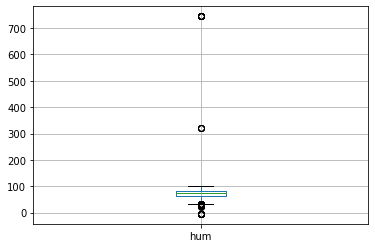

In [126]:
data[['hum']].boxplot()

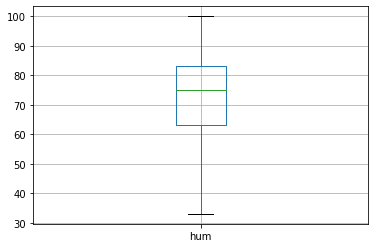

In [127]:
Q1 = data['hum'].quantile(0.25)
Q2 = data['hum'].quantile(0.75)
IQR = Q2 - Q1
min = Q1 - 1.5 * IQR
max = Q2 + 1.5 * IQR
data2 = data.loc[(data['hum'] < min) | (data['hum'] > max)]
data = data.drop(data2['hum'].index, axis = 0)
data[['hum']].boxplot()
plt.show()

<AxesSubplot:>

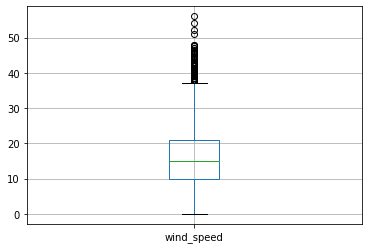

In [128]:
data[['wind_speed']].boxplot()

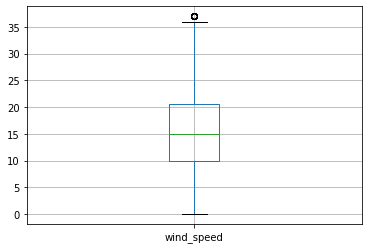

In [129]:
Q1 = data['wind_speed'].quantile(0.25)
Q2 = data['wind_speed'].quantile(0.75)
IQR = Q2 - Q1
min = Q1 - 1.5 * IQR
max = Q2 + 1.5 * IQR
data2 = data.loc[(data['wind_speed'] < min) | (data['wind_speed'] > max)]
data = data.drop(data2['wind_speed'].index, axis = 0)
data[['wind_speed']].boxplot()
plt.show()

<AxesSubplot:>

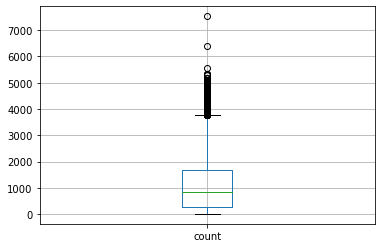

In [130]:
data[['count']].boxplot()

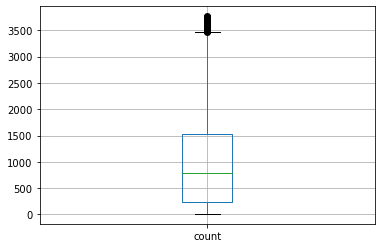

In [131]:
Q1 = data['count'].quantile(0.25)
Q2 = data['count'].quantile(0.75)
IQR = Q2 - Q1
min = Q1 - 1.5 * IQR
max = Q2 + 1.5 * IQR
data2 = data.loc[(data['count'] < min) | (data['count'] > max)]
data = data.drop(data2['count'].index, axis = 0)
data[['count']].boxplot()
plt.show()

<AxesSubplot:>

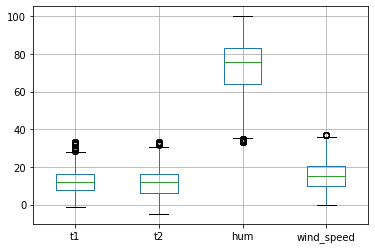

In [134]:
data[['t1', 't2', 'hum', 'wind_speed']].boxplot()

## Visualization

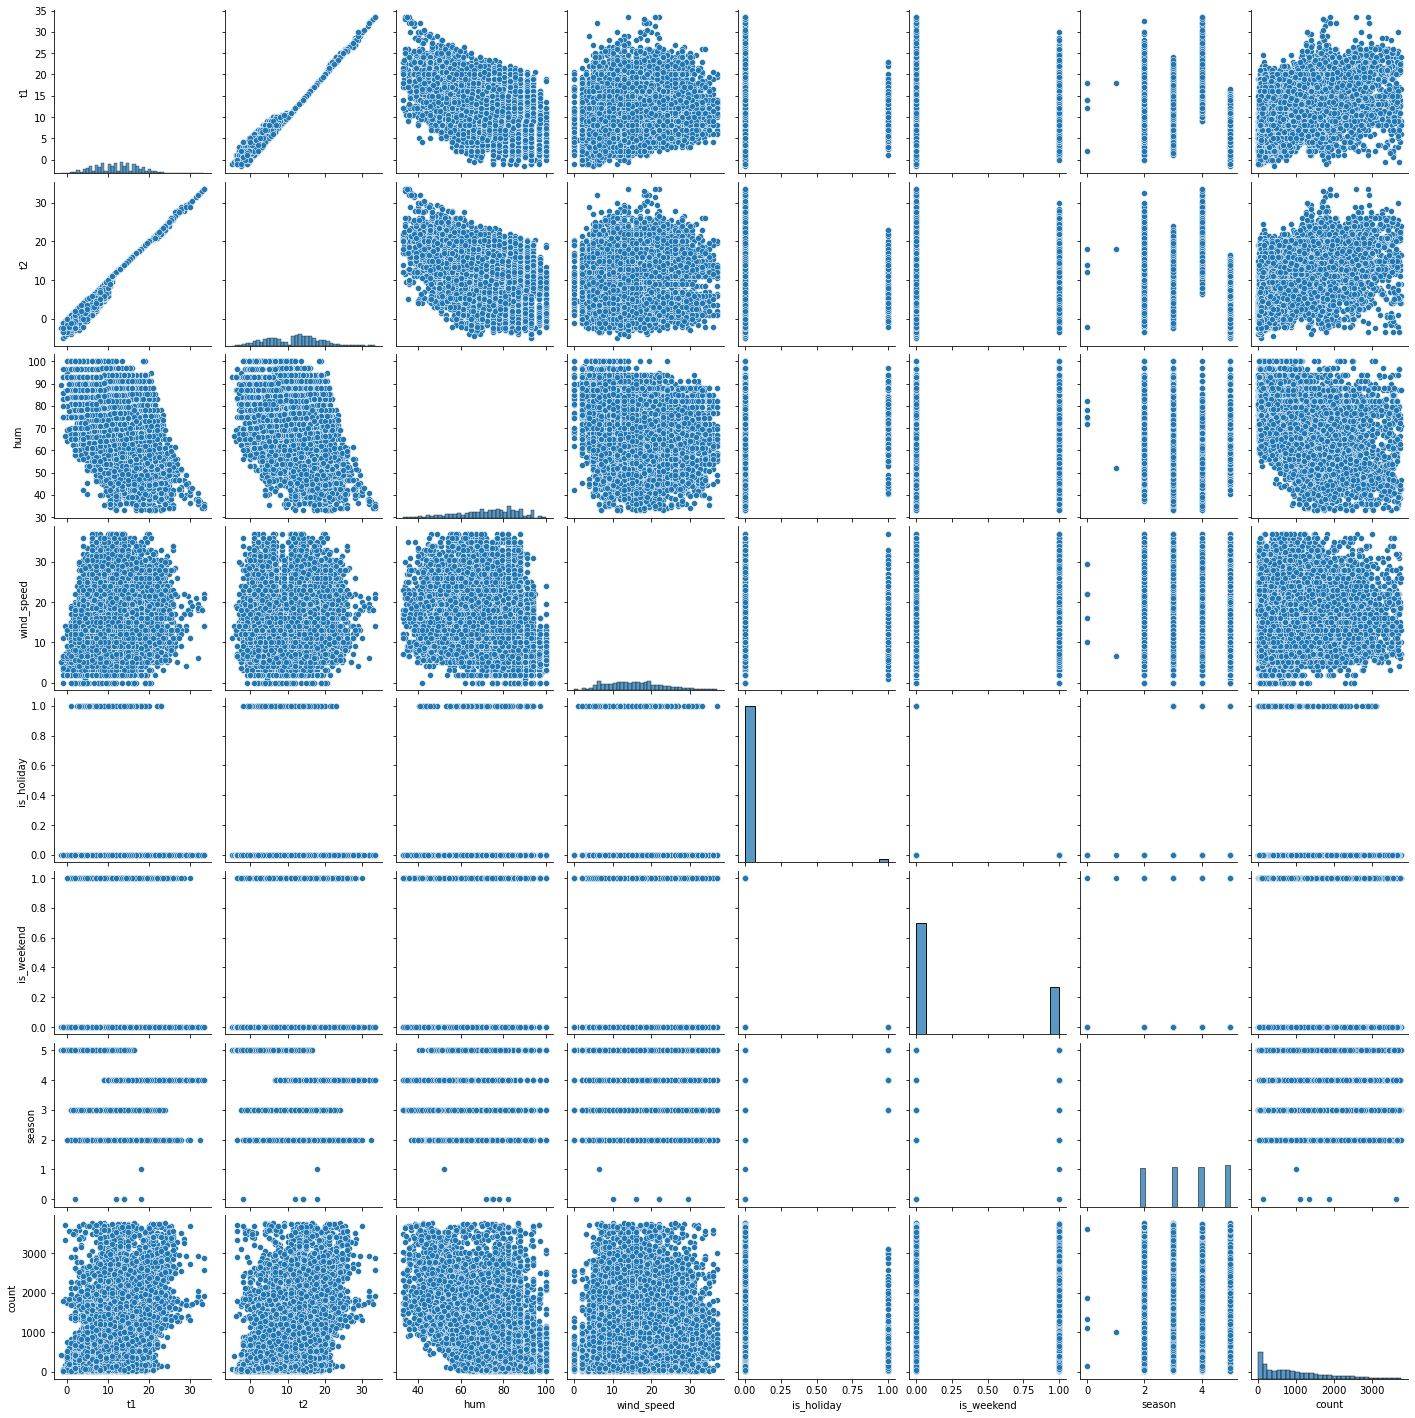

In [136]:
sns.pairplot(data)

## Correlation

In [137]:
data.corr()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,season,count
t1,1.000000,0.987075,-0.415559,0.157690,-0.025533,0.017864,-0.178808,0.371688
t2,0.987075,1.000000,-0.375552,0.102086,-0.023040,0.013578,-0.202895,0.353296
hum,-0.415559,-0.375552,1.000000,-0.287371,0.016614,0.024306,0.033712,-0.494857
wind_speed,0.157690,0.102086,-0.287371,1.000000,-0.005470,0.006366,0.108756,0.153888
is_holiday,-0.025533,-0.023040,0.016614,-0.005470,1.000000,-0.092408,0.046090,-0.026394
is_weekend,0.017864,0.013578,0.024306,0.006366,-0.092408,1.000000,-0.010981,-0.049624
season,-0.178808,-0.202895,0.033712,0.108756,0.046090,-0.010981,1.000000,-0.063634
count,0.371688,0.353296,-0.494857,0.153888,-0.026394,-0.049624,-0.063634,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 't1'),
  Text(0, 1.5, 't2'),
  Text(0, 2.5, 'hum'),
  Text(0, 3.5, 'wind_speed'),
  Text(0, 4.5, 'is_holiday'),
  Text(0, 5.5, 'is_weekend'),
  Text(0, 6.5, 'season'),
  Text(0, 7.5, 'count')])

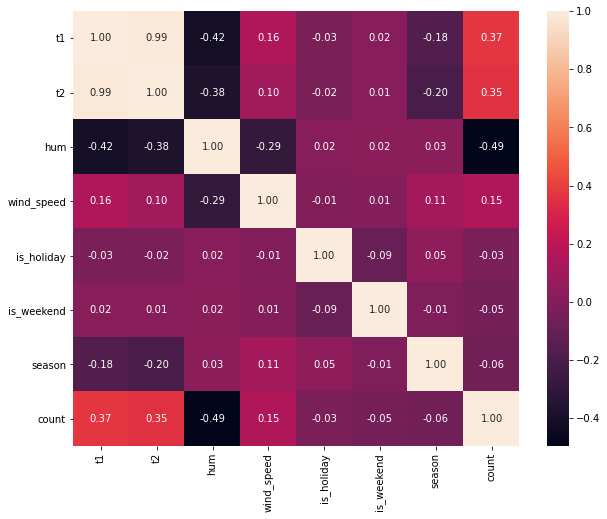

In [142]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

<font color='green'>Obviously there is a strong relationship between t1 and t2. Some correlation between t1,t2 and hum. 

<font color='green'>Most of all we see the influence of hum on our target value, a little from t1 and m2, but with the rest of the characteristics weaker connection

### Features and target value

<font color='green'> Target value is the count of a new bike shares, and our task is to determine how many bike shares

In [190]:
features = data.loc[:, 't1':'season':]

In [191]:
target = data[['count']]

In [192]:
features

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,7.0,3.5,81.0,22.0,0,0,0,3
3,13.5,13.5,77.0,20.5,0,0,1,5
4,16.0,16.0,83.0,6.5,0,0,1,4
6,17.0,17.0,85.5,34.0,0,0,1,2
7,15.0,15.0,68.0,19.5,0,0,1,5
...,...,...,...,...,...,...,...,...
10252,15.0,15.0,74.5,15.0,0,0,1,4
10253,14.0,14.0,63.0,27.5,0,0,0,2
10254,14.5,14.5,65.0,12.0,0,0,1,2
10255,14.0,14.0,72.0,23.0,0,0,0,2


In [193]:
target

,count
0,44
3,909
4,276
6,824
7,527
...,...
10252,1920
10253,1014
10254,860
10255,45


---

## Hypothesis testing

In [156]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
t1,9229.0,12.267779,5.477592,-1.5,8.0,12.0,16.0,33.5
t2,9229.0,11.413082,6.436548,-5.0,6.0,12.0,16.0,33.5
hum,9229.0,72.917570,13.989175,33.0,64.0,75.5,83.0,100.0
wind_speed,9229.0,15.639659,7.539917,0.0,10.0,15.0,20.5,37.0
is_holiday,9229.0,0.019612,0.138671,0.0,0.0,0.0,0.0,1.0
is_weekend,9229.0,0.299166,0.457917,0.0,0.0,0.0,1.0,1.0
season,9229.0,3.517282,1.125352,0.0,3.0,4.0,5.0,5.0
count,9229.0,1009.764330,883.872075,10.0,236.0,792.0,1531.0,3767.0


<font color='green'>For hypothesis testing I choose t1, and our null hypothesis states that the mean temperature is 12

H0: mu = 12
<br>
H1: mu > 12

In [158]:
def simple_random_sampling(data, size):
    population=[]
    for i in range(size):
        population.append((data.iloc[randint(0,len(data.index)-1)]))
    return population

In [159]:
sample = simple_random_sampling(data.t1, 100)

In [160]:
sample_mean = np.mean(sample)
sample_mean

12.743333333333334

In [161]:
alpha = 0.05

In [165]:
z_score = (sample_mean-12)/(data.t1.std()/sqrt(len(sample)))
z_score

1.357044083535138

p_value(Z>1.36)=1-P(Z<1.36)=1-0.913085

In [166]:
1-0.913085

0.08691499999999996

In [219]:
#сделать вывод (5%)

<font color='green'>Fail to reject null hypothesis because p_value=0.087>0.05
    
<font color='green'>This means that the average temperature is really 12

---

## <font color='green'>Linear Regression Model

### Divide into train and test sets

In [194]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3,  random_state = 42)

In [195]:
x_train.shape, y_train.shape

((6460, 8), (6460, 1))

In [196]:
x_test.shape, y_test.shape

((2769, 8), (2769, 1))

## Train the model

In [197]:
lr_model = linear_model.LinearRegression()

In [198]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [199]:
y_predict = lr_model.predict(x_test)

In [200]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R^2 Score', np.sqrt(metrics.r2_score(y_test, y_predict)))

Mean Absolute Error: 573.6167087231973
Mean Squared Error: 553013.61043602
Root Mean Squared Error: 743.6488488769548
R^2 Score 0.5295023779977815


## Improving the model

In [202]:
np.mean(cross_val_score(lr_model, x_test, y_test, cv=5))

0.2750670166954219

In [208]:
data_n = preprocessing.normalize(data.loc[:, 't1':'count':])

In [210]:
data_n = pd.DataFrame(data_n, columns=data.loc[:, 't1':'count':].columns)

In [211]:
data_n

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,0.073577,0.036789,0.851394,0.231243,0.000000,0.000000,0.000000,0.031533,0.462486
1,0.014791,0.014791,0.084365,0.022461,0.000000,0.000000,0.001096,0.005478,0.995946
2,0.055325,0.055325,0.286999,0.022476,0.000000,0.000000,0.003458,0.013831,0.954359
3,0.020495,0.020495,0.103078,0.040990,0.000000,0.000000,0.001206,0.002411,0.993402
4,0.028186,0.028186,0.127778,0.036642,0.000000,0.000000,0.001879,0.009395,0.990277
...,...,...,...,...,...,...,...,...,...
9224,0.007806,0.007806,0.038769,0.007806,0.000000,0.000000,0.000520,0.002082,0.999154
9225,0.013772,0.013772,0.061976,0.027053,0.000000,0.000000,0.000000,0.001967,0.997519
9226,0.016806,0.016806,0.075338,0.013908,0.000000,0.000000,0.001159,0.002318,0.996774
9227,0.155230,0.155230,0.798326,0.255021,0.000000,0.000000,0.000000,0.022176,0.498954


In [212]:
poly = PolynomialFeatures(2)

In [213]:
poly_matrix = poly.fit_transform(data_n.loc[:, :'season':])

In [214]:
data_poly = pd.DataFrame(poly_matrix)

In [215]:
data_poly['count'] = data_n['count']

In [216]:
data_poly.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,count
0,1.0,0.073577,0.036789,0.851394,0.231243,0.0,0.0,0.000000,0.031533,0.005414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000994,0.462486
1,1.0,0.014791,0.014791,0.084365,0.022461,0.0,0.0,0.001096,0.005478,0.000219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.000006,0.000030,0.995946
2,1.0,0.055325,0.055325,0.286999,0.022476,0.0,0.0,0.003458,0.013831,0.003061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000012,0.000048,0.000191,0.954359
3,1.0,0.020495,0.020495,0.103078,0.040990,0.0,0.0,0.001206,0.002411,0.000420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.000003,0.000006,0.993402
4,1.0,0.028186,0.028186,0.127778,0.036642,0.0,0.0,0.001879,0.009395,0.000794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.000018,0.000088,0.990277


In [217]:
np.mean(cross_val_score(lr_model, data_poly.iloc[:, 1:44], data_poly[['count']], cv=5))

0.9926136999905871

<font color='green'>To improve the model, we used cross validation,normalization and polynomial features, as a result of which the cross validation of our model increased from 0.27 to 0.99

<font color='green'>During these steps, our model learned to determine with high accuracy the count of a new bike shares<font color='green'>